## Import Needed Classes

In [1]:
import statsmodels.api as sm
import sklearn.preprocessing as preprocessing
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

In [3]:
def acc_report(y_test, y_pred):
    # Calculate accuracy 
    acc = accuracy_score(y_test,y_pred) * 100
    print('Accuracy is :{0}'.format(acc))

    # Check the AUC for predictions
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('\nAUC is :{0}'.format(round(roc_auc, 2)))

    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
    print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

In [1]:
def plot_feature_importances(data_train, model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,16))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [5]:
def run_dec_tree(Xtrain, ytrain, Xtest, **kwargs):
    # Build a regular tree as baseline
    tree = DecisionTreeClassifier(**kwargs )
    tree.fit(Xtrain, ytrain)
    # Make predictions for Train data
    ypred_train = tree.predict(Xtrain)
    # Make predictions for test data
    ypred_test = tree.predict(Xtest)
    return tree, ypred_train, ypred_test

## Load Data for Modeling

In [6]:
#### Load Data for Modeling
import pandas as pd

data = pd.read_csv('./data/2018_model_data.csv')

In [7]:
data.drop(columns=['Unnamed: 0'],inplace=True)

## Create features, labels, training, and test data
# Build Baseline Model Decision Tree Balanced


In [8]:
#### Create features, labels, training, and test data


In [9]:
# Split the dataset in the ratio train 80% and test 20%
X = data.drop("DELAYED", axis = 1)
y = data['DELAYED']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Train the classifier and make predictions

In [20]:
# Build a regular tree as baseline
#Fits and predicts train and test data
tree_clf1, y_pred_train1, y_pred_test1 = run_dec_tree(X_train_scaled, y_train,
                                                    X_test_scaled, 
                                                    random_state=10, 
                                                    class_weight='balanced',
                                                    criterion='entropy')

## Check predictive performance

In [14]:
#Check predictive performance Train
print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92   1249891
           1       0.62      0.99      0.76    304973

    accuracy                           0.88   1554864
   macro avg       0.81      0.92      0.84   1554864
weighted avg       0.92      0.88      0.89   1554864



In [15]:
#Check predictive performance Test
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79    312133
           1       0.27      0.39      0.32     76583

    accuracy                           0.68    388716
   macro avg       0.55      0.57      0.55    388716
weighted avg       0.72      0.68      0.70    388716



Observation Between the Train and the Test accuracy we have <br>
88% and F1 of 84% vs 68% and F1 of 55% so some Overfitting

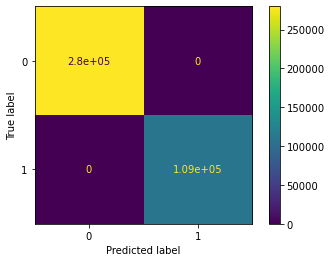

In [16]:
# Alternative confusion matrix
plot_confusion_matrix(tree_clf1, X_test_scaled, y_pred_test1, values_format='.3g')
plt.show()

In [ ]:
#Observation: Accuracy 74%  Precision 84% Recall 84% F1 

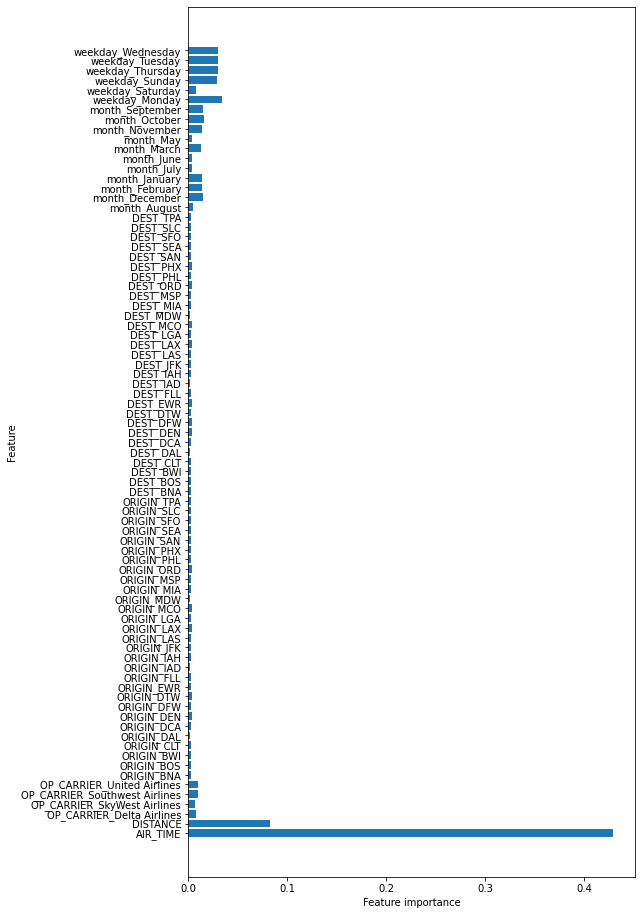

In [18]:

plot_feature_importances(X_train, tree_clf1)

# Build Model Decision Tree Entropy

## Train the classifier and make predictions

In [21]:
# Build a regular tree as baseline
#Fits and predicts train and test data
tree_clf2, y_pred_train2, y_pred_test2 = run_dec_tree(X_train_scaled, y_train,
                                                    X_test_scaled, 
                                                    random_state=10, 
                                                    class_weight='balanced',
                                                      criterion='entropy'
                                                 )

## Check predictive performance

In [22]:
#Check predictive performance Train
print(classification_report(y_train,y_pred_train2))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92   1249891
           1       0.62      0.99      0.76    304973

    accuracy                           0.88   1554864
   macro avg       0.81      0.92      0.84   1554864
weighted avg       0.92      0.88      0.89   1554864



In [23]:
#Check predictive performance Test
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79    312133
           1       0.27      0.39      0.32     76583

    accuracy                           0.68    388716
   macro avg       0.55      0.57      0.55    388716
weighted avg       0.72      0.68      0.70    388716



Observation Between the Train and the Test accuracy we have <br>
88% and F1 of 84% vs 68% and F1 of 55% so some Overfitting

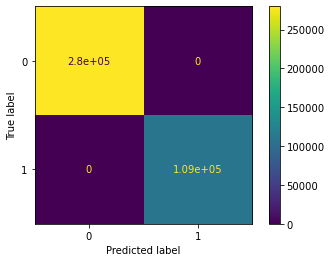

In [16]:
# Alternative confusion matrix
plot_confusion_matrix(tree_clf2, X_test_scaled, y_pred_test2, values_format='.3g')
plt.show()

In [ ]:
#Observation: Accuracy 74%  Precision 84% Recall 84% F1 

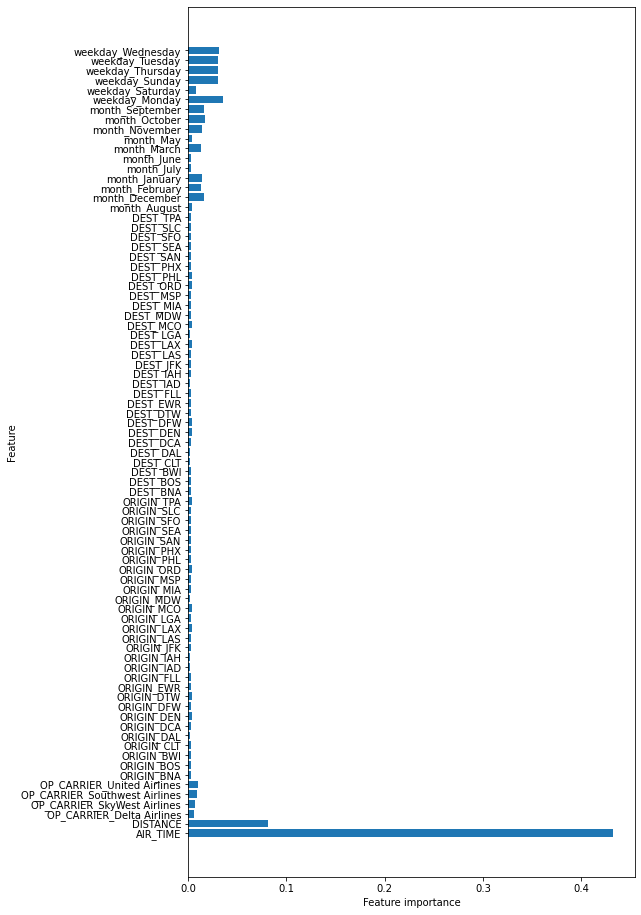

In [24]:

plot_feature_importances(X_train, tree_clf2)

# GridSearch for optimal params

In [ ]:
clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'class_weight' : ['balanced']
}

gs_tree = GridSearchCV(clf, param_grid, cv=3,return_train_score=True)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

In [ ]:
gs_tree.cv_results_

In [ ]:
# Mean training score
dt_gs_training_score = np.mean(gs_tree.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = gs_tree.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")

# Run Model with Optimal Params



Grid Search identified these params as optimal<br>
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}

Run Time 2 hrs 56 mins <br>
secondrun
{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}
 Mean Training Score: 64.48%
Mean Test Score: 74.05%

## Train the classifier and make predictions

In [ ]:
# Build a regular tree as baseline
tree_clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

tree_clf3.fit(X_train_scaled, y_train)

In [ ]:
# Make predictions for test data
y_pred3 = tree_clf3.predict(X_test_scaled)

## Check predictive performance

In [ ]:
#Check predictive performance
print(classification_report(y_test,y_pred3))

In [ ]:
acc_report(y_test, y_pred3)

In [ ]:
#Observation: Accuracy 81%  Precision 81% Recall 99% F1 89

In [ ]:
# Alternative confusion matrix
plot_confusion_matrix(tree_clf3, X_test, y_test, values_format='.3g')
plt.show()

# Second "Optimal"

## Train the classifier and make predictions

In [ ]:
#Builds a tree and Fits the tree and predicts for the train and test splits
def run_dec_tree(Xtrain, ytrain, Xtest, **kwargs):
    # Build a regular tree as baseline
    tree = DecisionTreeClassifier(**kwargs )
    tree.fit(Xtrain, ytrain)
    # Make predictions for Train data
    ypred_train = tree.predict(Xtrain)
    # Make predictions for test data
    ypred_test = tree.predict(Xtest)
    return tree, ypred_train, ypred_test

optimal {'class_weight': 'balanced',
'max_depth': 15,
 'min_samples_leaf': 35,
 'min_samples_split': 120}

In [29]:
tree_clf4, y_pred_train4, y_pred_test4 = run_dec_tree(X_train_scaled, y_train, X_test_scaled, 
                                                random_state=10,  criterion='gini',
                                   class_weight='balanced',
                                   max_depth= 65)

## Check predictive performance

In [27]:

#Check predictive performance
print(classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73    312133
           1       0.28      0.59      0.38     76583

    accuracy                           0.62    388716
   macro avg       0.57      0.61      0.55    388716
weighted avg       0.75      0.62      0.66    388716



In [28]:
#Check predictive performance
print(classification_report(y_train,y_pred_train4))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76   1249891
           1       0.34      0.70      0.46    304973

    accuracy                           0.67   1554864
   macro avg       0.62      0.68      0.61   1554864
weighted avg       0.79      0.67      0.70   1554864



In [ ]:
acc_report(y_test, y_pred_test4)

In [ ]:
#Observation: Accuracy 74%  Precision 84% Recall 84% F1 

In [ ]:
# Alternative confusion matrix
plot_confusion_matrix(tree_clf4, X_test_scaled, y_test, values_format='.3g')
plt.show()

In [ ]:
from sklearn import tree


Plot Decision Tree

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (120,100), dpi=300)
tree.plot_tree(tree_clf4,
               feature_names = X.columns,
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()